+------+--------+--------------------+----------+
|Months|Sunspots|            features|prediction|
+------+--------+--------------------+----------+
|   0.0|    58.0|              [58.0]|         2|
|   1.0|    62.6|[62.599998474121094]|         2|
|   2.0|    70.0|              [70.0]|         2|
|   3.0|    55.7| [55.70000076293945]|         2|
|   4.0|    85.0|              [85.0]|         3|
|   5.0|    83.5|              [83.5]|         3|
|   6.0|    94.8| [94.80000305175781]|         3|
|   7.0|    66.3| [66.30000305175781]|         2|
|   8.0|    75.9|  [75.9000015258789]|         2|
|   9.0|    75.5|              [75.5]|         2|
|  10.0|   158.6|[158.60000610351562]|         4|
|  11.0|    85.2| [85.19999694824219]|         3|
|  12.0|    73.3| [73.30000305175781]|         2|
|  13.0|    75.9|  [75.9000015258789]|         2|
|  14.0|    89.2| [89.19999694824219]|         3|
|  15.0|    88.3| [88.30000305175781]|         3|
|  16.0|    90.0|              [90.0]|         3|


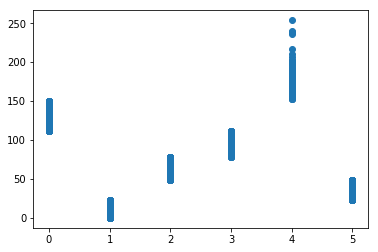

In [98]:

from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import FloatType,IntegerType
from pyspark.ml.clustering import KMeans

from pyspark.sql import SparkSession

#First way to load data 
sunspots = sc.textFile('./sunspots.txt')
data = sunspots.map(lambda k: k.split("\t"))

#Secound Way to  to load data 
# spark = SparkSession \
#         .builder \
#         .appName("clustering") \
#         .getOrCreate()
# data = spark.read.text("./sunspots.txt")
# data = data.rdd.map(lambda k: k['value'].split("\t"))

#Adding columns and casting 
sunspots_df = data.toDF(['Months','Sunspots'])
sunspots_df = sunspots_df.withColumn("Months", sunspots_df["Months"].cast(FloatType()))
sunspots_df = sunspots_df.withColumn("Sunspots", sunspots_df["Sunspots"].cast(FloatType()))

#Vectrozing columns
vecAssembler = VectorAssembler(inputCols=["Sunspots"], outputCol="features")
new_df = vecAssembler.transform(sunspots_df)

#fitting KMeans model
kmeans = KMeans(k=6, seed=1)  
model = kmeans.fit(new_df.select('features'))

#transforming your initial dataframe to include cluster
transformed = model.transform(new_df)
transformed.show() 

centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

    
# import numpy as np
# import matplotlib.pyplot as plt

# # Fixing random state for reproducibility
# np.random.seed(19680801)


# N = 50
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# # plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# # anomalies.select("Months").toPandas()

# plt.scatter(transformed.select("prediction").toPandas(), transformed.select("Sunspots").toPandas())

# # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# plt.show()
